# matplotlib
- 파이썬의 대표적인 과학 계산용 그래프 라이브러리
- plt.figure: 축과 그래프, 텍스트, 레이블을 표시하는 모든 객체를 포함하는 컨테이너
- plt.axes: 눈금과 레이블이 있는 테두리 박스로 시각화를 형성하는 플롯 요소 포함 하는 축

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

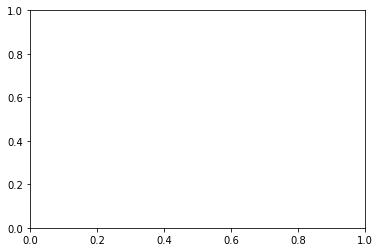

In [ ]:
plt.figure()
plt.axes()
plt.show()

## 단일 그래프

- plot 함수
    - line plot 를 그려주는 함수이다.
    - figure, axes 객체가 없다면 이를 만들어서 그려준다.

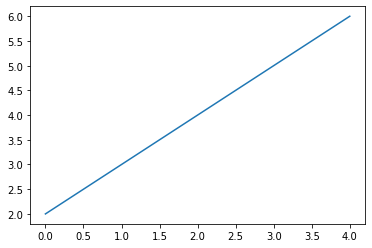

In [ ]:
plt.plot(np.arange(2,7))
plt.show()

## 다중 그래프
- 1개의 axes 안에 여러개의 그래프를 그린다.

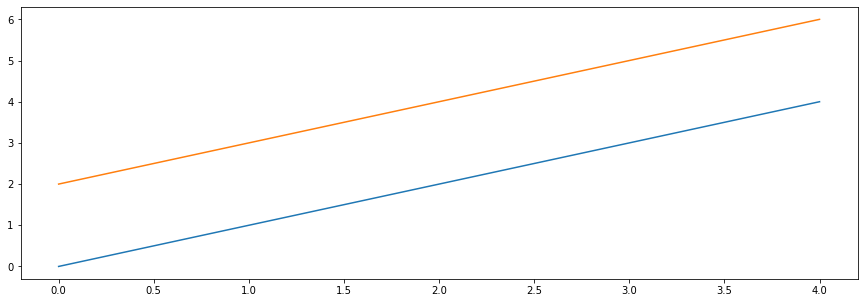

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(5))
plt.plot(np.arange(2,7))
plt.show()

## subplots 함수를 이용해서 axes 여러개 그리기
- 함수를 실행하면 figure 객체와 axes 객체를 반환한다.
- axes는 figure 내에서 축을 가지는 하나의 좌표평면과 같은 개념이다.
- 실제로 데이터가 그려지는 곳은 axes이다.

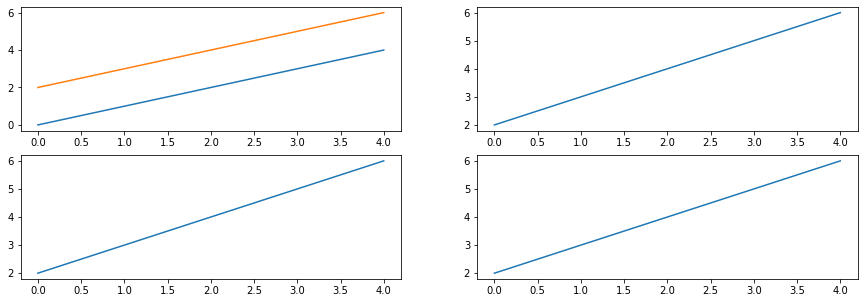

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(15,5))
ax[0,0].plot(np.arange(5))
ax[0,0].plot(np.arange(2,7))
ax[0,1].plot(np.arange(2,7))
ax[1,0].plot(np.arange(2,7))
ax[1,1].plot(np.arange(2,7))
plt.show()

## 타이틀 설정하기
- figure 객체의 suptitle 메소드
- axes 객체의 set_title 메소드

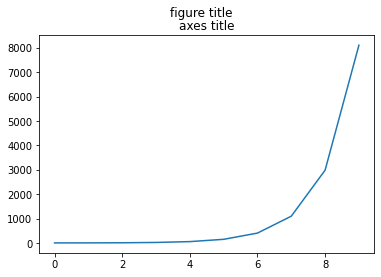

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("figure title") # figure 제목 넣기

x = range(0,10)
y = np.exp(x)
ax.plot(x,y)
ax.set_title("axes title")

plt.show()

## x,y 축에 이름 넣기
- axes 객체의 set_xlabel, set_ylabel 메소드

In [ ]:
x = range(1,1000)
y = np.log(x)

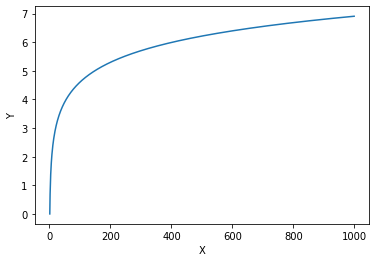

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

## Markers ,  Line Style , color 변경하기
- plot에 아규먼트를 지정해주면 된다.

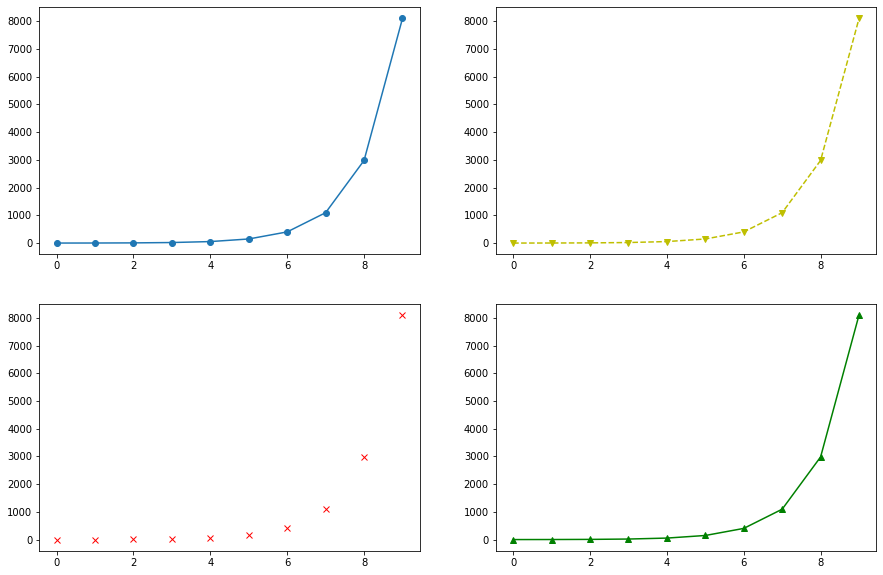

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].plot(np.exp(range(0,10)), marker="o")
ax[0,1].plot(np.exp(range(0,10)), marker="v",linestyle='--',color="y")
ax[1,0].plot(np.exp(range(0,10)), marker="x",linestyle='',color="r")
ax[1,1].plot(np.exp(range(0,10)), marker="^",color="g")
plt.show()

## 범례 표시하기
- axes 객체의 legend 메소드를 사용

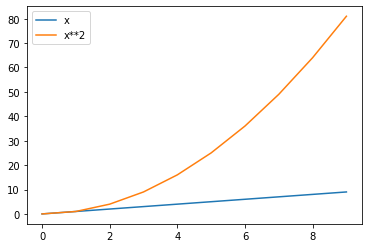

In [ ]:
fig, ax = plt.subplots()

x = np.arange(10)
ax.plot(x)
ax.plot(x**2)
ax.legend( ["x","x**2"] )
plt.show()

- total_bill: 지불금액
- tip: 팁금액
- sex: 성별
- smoker: 흡연자여부
- day: 요일
- time: 식사타임
- size: 인원수

In [ ]:
import seaborn as sns
df_tips = sns.load_dataset("tips")
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Line Plot
- 일반적으로 시간을 x 축에 두고 y축 데이터의 추이를 볼때 사용


In [ ]:
tmp = df_tips.groupby("day").agg({"total_bill":"sum"}).reset_index()
tmp

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


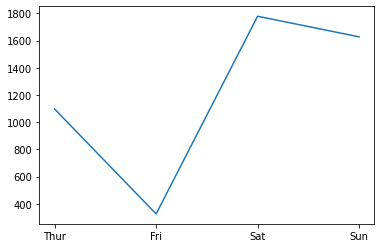

In [ ]:
fig, ax = plt.subplots()
ax.plot(tmp["day"],tmp["total_bill"])
plt.show()

## Scatter Plot
- 산점도 그래프
- 데이터 포인트의 분포를 확인하기 위해 사용하고 두변수사이의 관계를 시각화

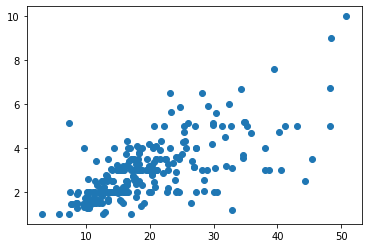

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_tips["total_bill"],df_tips["tip"])
plt.show()

# Barplot, Barhplot
- 범주형 변수에 대한 집계를 시각화


In [ ]:
df_tips["day"].value_counts().index

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

In [ ]:
df_tips["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

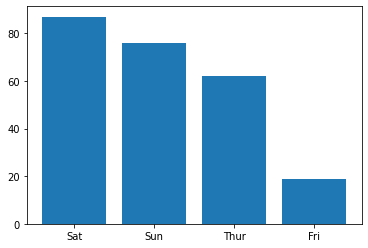

In [ ]:
fig,ax = plt.subplots()
ax.bar(df_tips["day"].value_counts().index,df_tips["day"].value_counts())
plt.show()

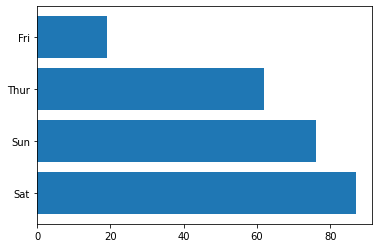

In [ ]:
fig,ax = plt.subplots()
ax.barh(df_tips["day"].value_counts().index,df_tips["day"].value_counts())
plt.show()

# Histogram
- 수치형 데이터 구간의 빈도수를 볼때 사용
- 데이터 분포를 볼때 사용한다.

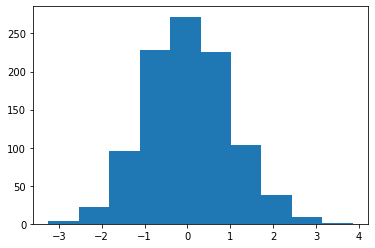

In [ ]:
np.random.seed(42)
arr = np.random.randn(1000)
fig ,ax = plt.subplots()
ax.hist(arr)
plt.show()

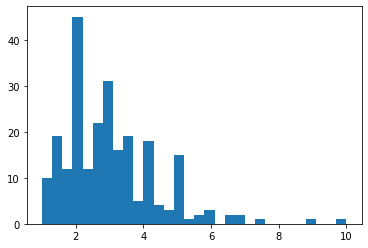

In [ ]:
fig,ax = plt.subplots()
ax.hist(df_tips["tip"],bins=30) # bins: 구간의 개수
plt.show()

# Box Plot
- 4분위수를 기준으로 데이터의 최대, 최소, Q1(25%지점), Q2(50%지점) , Q3(75%지점) 등 통계적인 부분들을 손쉽게 시각화
- 이상치도 쉽게 파악할수 있다.
- IQR(Inter Quantile Range)
    - Q3 - Q1
    - 3사분위수와 1사분위수의 차이
- Box Plot 최대값: Q3 + IQR * 1.5
- Box Plot 최소값: Q1 - IQR * 1.5

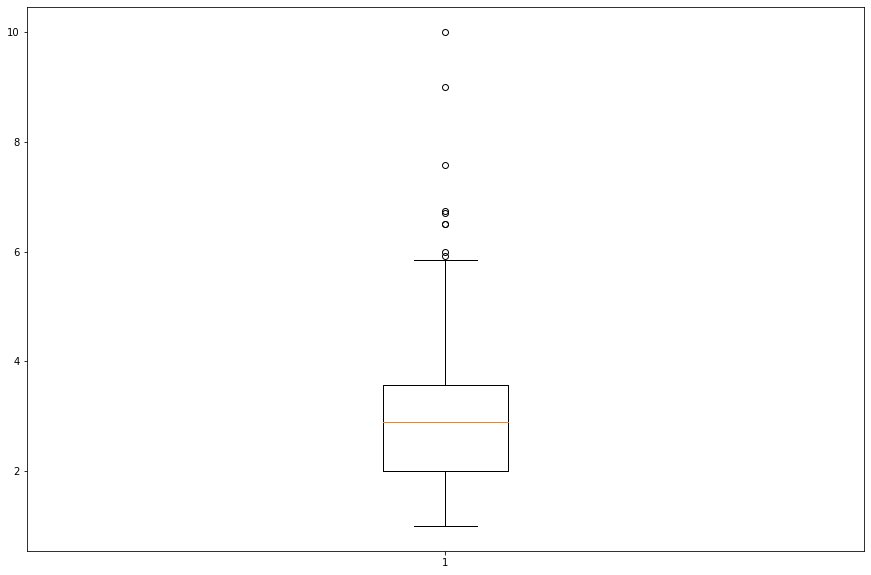

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.boxplot(df_tips["tip"])
plt.show()

- sepal_length: 꽃받침길이
- sepal_width: 꽃받침너비
- petal_length: 꽃잎길이
- petal_width: 꽃잎너비
- species: 꽃종류

In [ ]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Seaborn
- 내부적으로 Matplotlib 을 호출하여 시각화하는 라이브러리

## Relational plots
- 두 변수의 관계를 볼때


- lineplot

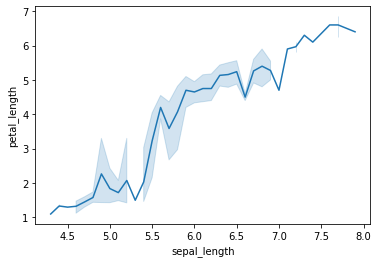

In [ ]:
sns.lineplot(x = "sepal_length" , y="petal_length" , data=df)
plt.show()

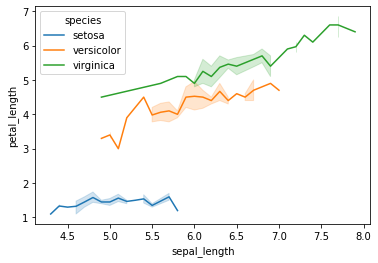

In [ ]:
sns.lineplot(x="sepal_length",y="petal_length",hue="species",data=df)
plt.show()

- scatterplot

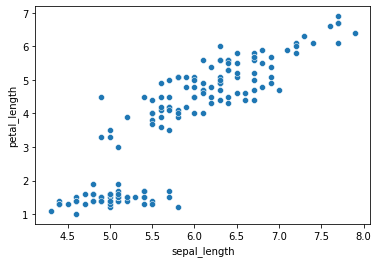

In [ ]:
sns.scatterplot(x="sepal_length",y="petal_length",data=df)
plt.show()

- relplot
    - lineplot 과 scatterplot 모두 그릴수 있다.

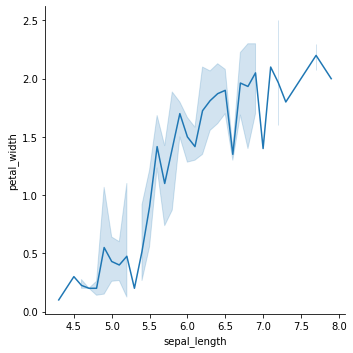

In [ ]:
sns.relplot(x="sepal_length",y ="petal_width" ,data = df,kind = 'line') # kind = 'line'
plt.show()

- lmplot
    - 추정회귀선과 산점도를 그린다.
    - 추정회귀선이란 x 에 따른 y값의 변화를 잘 설명하는 직선

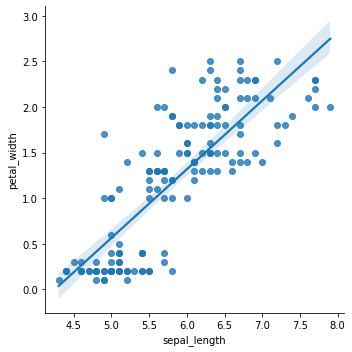

In [ ]:
sns.lmplot(x="sepal_length",y="petal_width",data=df)
plt.show()

- heatmap

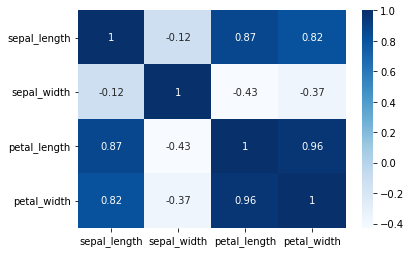

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

- pairplot
    - 대각선 받향으로 히스토그램을 나타낸다
    - 서로 다른 두변수간의 산점도를 그린다.

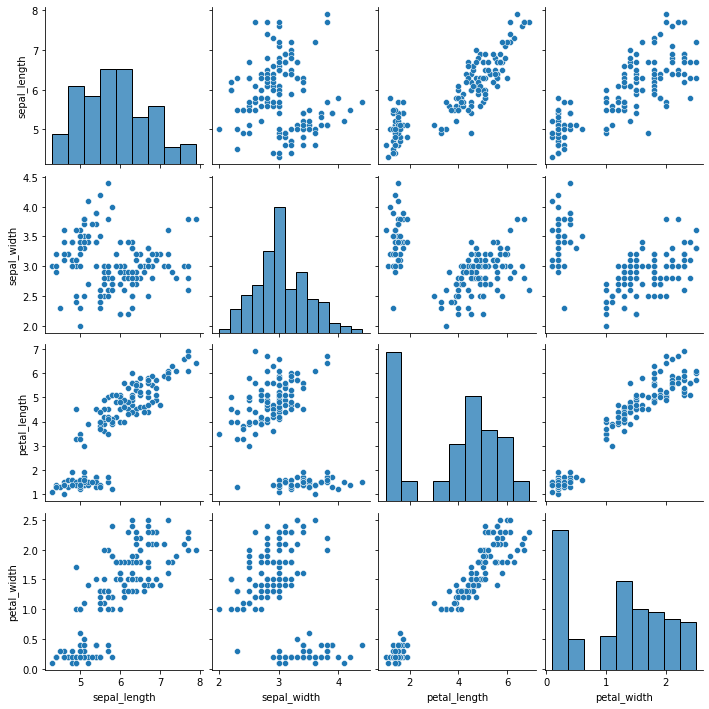

In [ ]:
sns.pairplot(data=df)
plt.show()

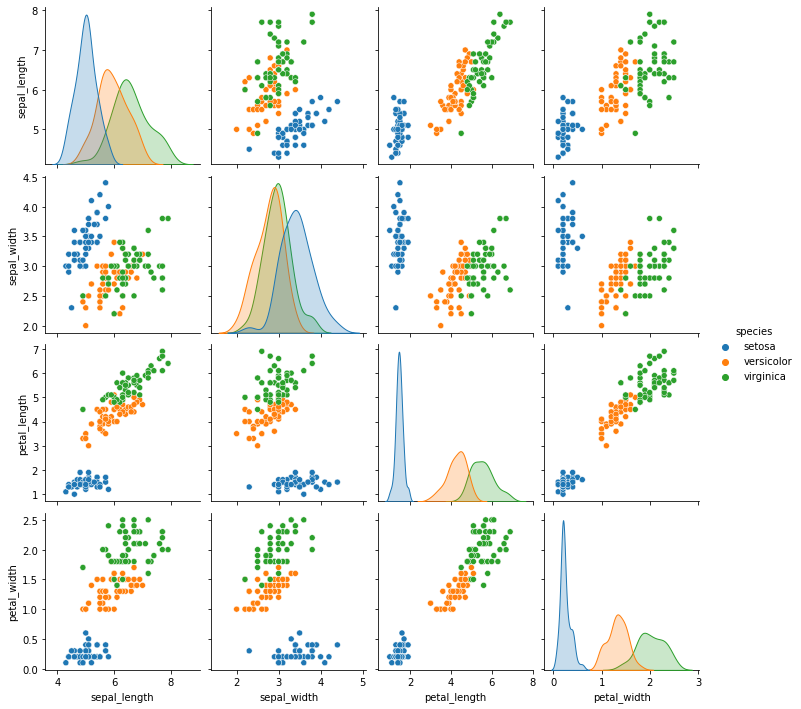

In [ ]:
sns.pairplot(data=df,hue="species")
plt.show()

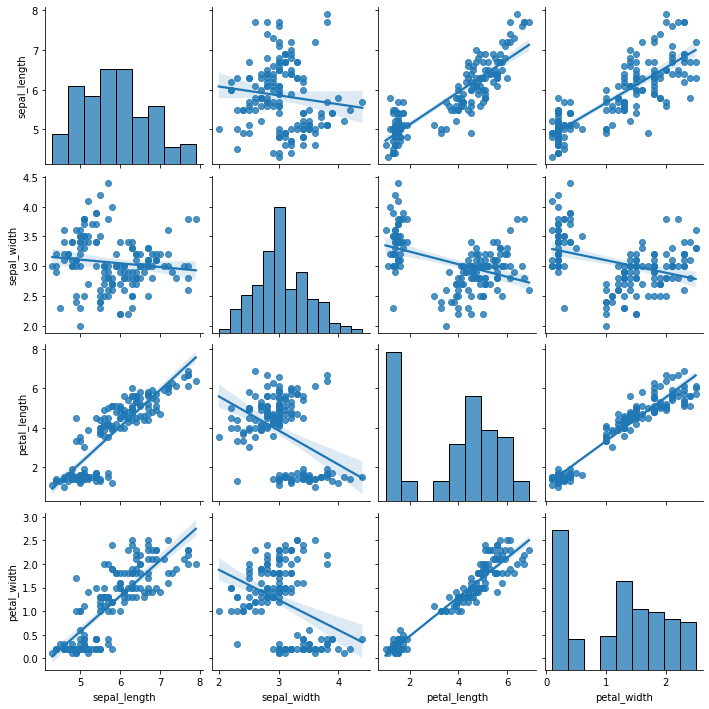

In [ ]:
sns.pairplot(data=df,kind="reg")
plt.show()

## Distribution plots
- 변수의 데이터에 분포 볼때

- distplot

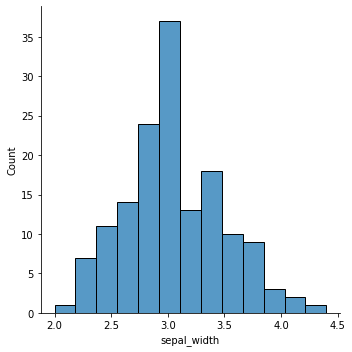

In [ ]:
sns.displot(df["sepal_width"]) # kind="kde"
plt.show()

- kdeplot

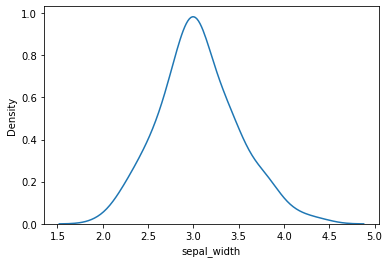

In [ ]:
sns.kdeplot(df["sepal_width"])
plt.show()

## Categorical plots
- 범주형 변수의 집계나 범주형 변수와 수치형 변수간에 관계를 볼때

In [ ]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


- countplot

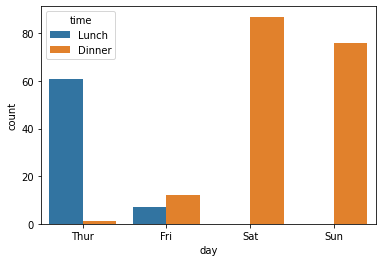

In [ ]:
sns.countplot(x="day",hue="time",data=df_tips) # 요일별 식사타임 카운팅
plt.show()

- barplot
    - x(범주형)에 대한 y(수치형)의 통계치를 bar 형태로 시각화
    - 신뢰구간도 표시!!

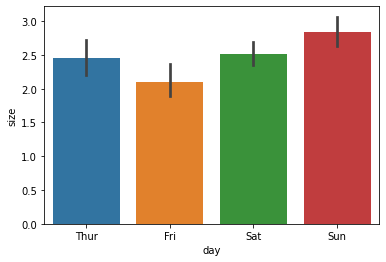

In [ ]:
sns.barplot(x="day",y="size",data=df_tips) # 요일별 인원수 평균
plt.show()

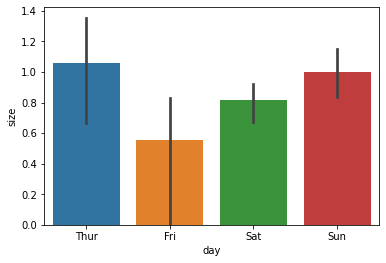

In [ ]:
sns.barplot(x="day",y="size",data=df_tips,estimator=np.std)
plt.show()

- boxplot

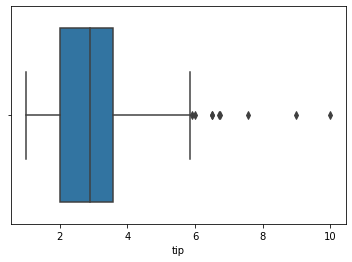

In [ ]:
sns.boxplot(x="tip",data=df_tips)
plt.show()

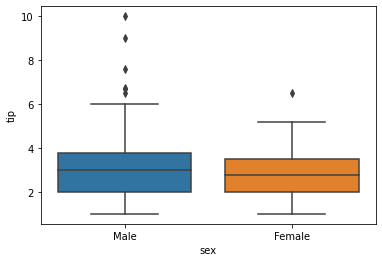

In [ ]:
sns.boxplot(x="sex",y="tip",data=df_tips)
plt.show()